# The matrix blackboard

In [2]:
%matplotlib inline
from skimage import data, io, draw
import skimage.filters
from skimage.io import imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this first part of the exercise you will get to know the basics of how images are represented and manipulated in Python. There are actually more than a few conteners to the title of most popular scientific image processing library in Python, but luckily the all packages accept `numpy` arrays as a common image representation, and can therefore be mixed and matched as you please. Below is a list of the most notable packages:

- [Mahotas](http://luispedro.org/software/mahotas)
- [Scikit-image](http://scikit-image.org/)
- [OpenCV](http://opencv.org/)
- [SimpleCV](http://simplecv.org/)

In these exercises and for the homework we will be using [scikit-image](http://scikit-image.org/). 

You'll meet three types of images with different representations. 

#### Black-and-white images

Pixels are either on or off. Black-and-white images are stored as 2-dimensional arrays of zeros and ones (optionally `True` and `False` values)



#### Grayscale images

Like black-and-white images, grayscale images associate a single number with each pixel. The number is the lightness of the pixel, which may be black, white, or any of the grays in between.


#### Color images

In color images a pixel is represented by an ordered list of numbers, typically three or four. Taken across the whole image these numbers are also called channels. 

In the RGB model the channels are red, green, and blue. The RGBA model extends this with an alpha channel, which encodes the transparency of a pixel. 

Color images are 3-dimensional arrays, which people sometimes refer to as tensors.

### Black-and-white images (2 dimensions)

Here is an inspirational image titled *Before the dawn of time*.

You will be given the opportunity to wreak havock with it in a moment, so enjoy it while it lasts.

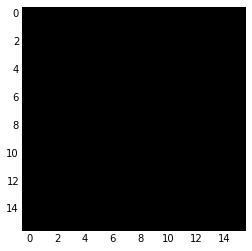

In [5]:
black_img = np.zeros((16, 16), dtype=bool)
imshow(black_img);

### White lines

As promised we are about to disturb the deep silence and calm of the black canvas by drawing a couple of white lines. The image is indexed by two lists, one produced by `range(4, 10)` and the other by `np.repeat(4, 6)`. These lists gives the row indices `[4, 5, 6, 7, 8, 9]` and the column indices `[4, 4, 4, 4, 4, 4]` for the pixels to be updated. Thus the first pixel updated is located at $(4, 4)$.

In [41]:
black_img[range(4,10), np.repeat(4, 6)] = True
black_img[range(4,10), np.repeat(9, 6)] = True

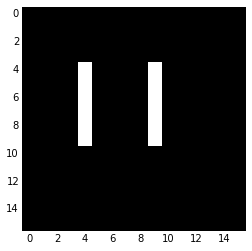

In [38]:
imshow(black_img);

**Exercise** Add two horizontal lines to the black image. They should start at rows 4 and 9, and span the columns 4 to 9 (both inclusive). 

In [ ]:
# Your code here

As mentioned there is a a close correspondence between the rendering of the image as black and white pixels and the values in the array. The exercise below should prove this point. 

**Exercise** Print the values in each row of the `black_img` on a separate line. Convert the values to zeros and ones before printing and put one space between each number. If you follow these instructions, the first three rows will look like this:

```
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
```

Hint: You can use a `for` loop to easily iterate over the rows. E.g. `for row in black_img` provides you with each row of the array in turn.

**Exercise** Instead of outputting a zero for pixels that are not set, output an empty space " "

In [ ]:
# Your code here

### Drawing when your canvas is a matrix and your pen is a linear algebra

Here are a couple of exercises related to drawing. Initialize a black $16 \times 16$ canvas before each new drawing.


**Exercise** Draw lines across both diagonals, making a cross

In [ ]:
# Your code here

**Exercise** Draw a circle - or as close of an approximation as is possible

In [ ]:
# Your code here

**Exercise** Draw a smiley. Pick your favourite.

In [ ]:
# Your code here

## Gray-scale images (2 dimensions)

Below is a pretty random gray-scale picture. The input to the rendering function is a $16 \times 16$ array, which is the same dimensionality as for the black-and-white image. The reason `imshow` can tell it is a grayscale image is that it finds intermediate values between the two extremes. This would be clearly visible in a histogram.

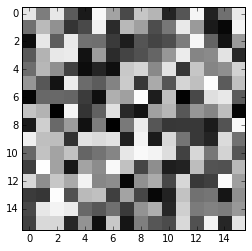

In [9]:
# Numbers between 0 and 1
grayscale = np.random.random((16, 16)) 
imshow(grayscale);

As before, a value of zero indicates "lights off", whereas a value of one is bright sunlight. We can therefore adjust the overall lightness of an image simply by scaling the matrix representing the image.

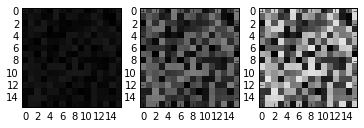

In [39]:
# Create a three-axis subplot
fig, axes = plt.subplots(ncols=3)

# `sca` abbrevates "set current axis"
for i, scaling in enumerate([.1, .5, .9]):
    plt.sca(axes[i])
    imshow(grayscale * scaling)

What happens if we scale with a number above one? I dare you to try it.

In [19]:
# imshow(grayscale * 1.1);

**Exercise** Create a gray-scale gradient. The lightness in a gradient is constant across any given row but increases with the row number. The gradient should start with minimum intensity (black) at the first row, and gradually become more white. Below is an example of a gradient. 

<img src="gradient_grayscale.png" width="100">

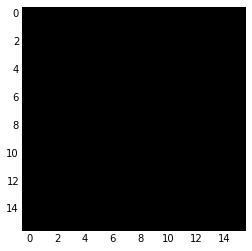

In [22]:
gradient_img = np.zeros((16, 16))
# Your code here
imshow(gradient_img);

**Exercise** Now, quick, turn the gradient 90 degrees so it becomes lighter from left to right! You should be able to do this in a single line, reusing the `gradient_img` from last exercise.

In [ ]:
# Your code here

## Color images (3 dimensions)

Color images are represented as 3-dimensional structures. The two first dimensions are the rows and columns of the image. The third dimension contains color information, most typically represented by three numbers indicating the mixture of **R**ed, **G**reen, and **B**lue (RGB) in the color.

Working with 3-dimensional images is actually not that different from working with 2-dimensional images, and you won't have to learn any new functions.

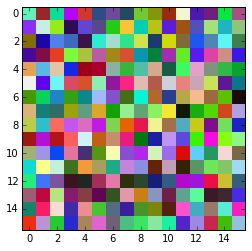

In [40]:
np.random.seed(42)
random_color_image = np.random.random((16, 16, 3))
imshow(random_color_image);

Uhh, lots of pretty colors. 

Let's examine the contents of cell $i=4$, $j=3$. It looks blue, but what is the mixture of colors actually?

In [31]:
almost_blue_pixel = random_color_image[4, 3]
almost_blue_pixel

array([ 0.08413996,  0.16162871,  0.89855419])

**Exercise** Make separate red, green and blue pixel arrays called `red_pixel`, `green_pixel` and `blue_pixel`. They should have the same shape as `almost_blue_pixel`. Then display all of them in a 5 by 1 image, where the fourth pixel is the sum of the previous three, and the fifth pixel consists of all zeros.

In [ ]:
# Your code here

## Converting between images

It is useful to be able to convert between color images, grayscale images, and black-and-white images. Color images are richer than grayscale images, which again contain more information than black-and-white images. Conversion is this direction therefore loses information. However, grayscale and black-and-white images may be used for other purposes than display: filters, selectors, and masks. 

In this exercise you will convert an image from RGB colors to grayscale. First you will use a simple method in which red, green, and blue contribute equally to the lightness of the pixels in the grayscale image. This works surpringly well for many images, including all of the test images distributed with scikit-image. For the image you are given, however, a better method exists. 

We begin by loading in the image.

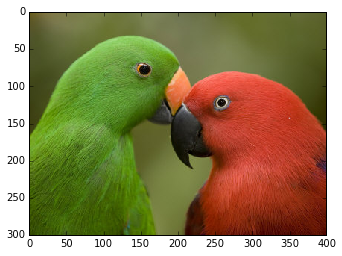

In [33]:
parrot_image = data.imread("parrot-green-yellow.jpg")
imshow(parrot_image);

**Exercise** Display the individual color channels in a 3-column subplot. By default `imshow` uses the current active axis, which you can change by calling `plt.sca`. The title of each subplot should reflect the name of the color channel.

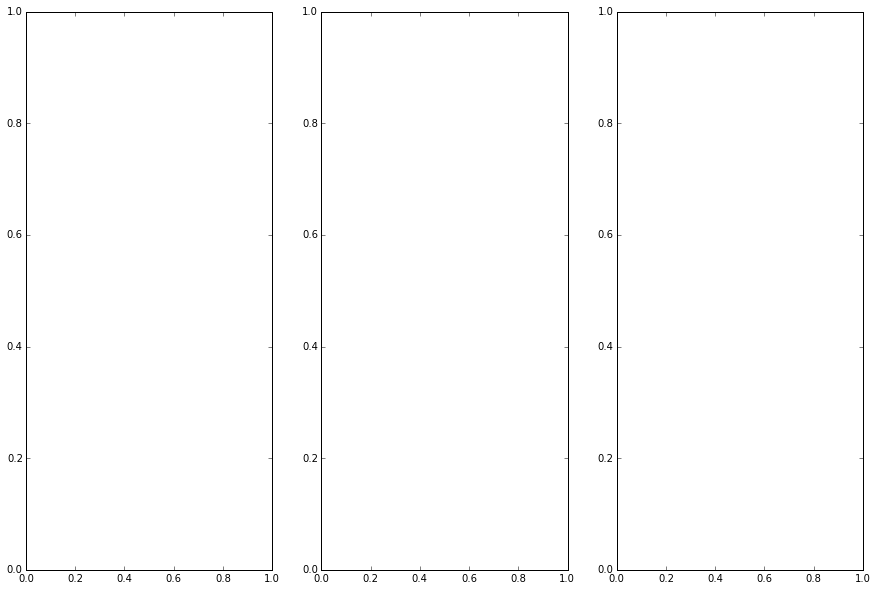

In [36]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 10))
# Your code here

**Exercise** Reduce the color image to a gray-scale image by taking the mean across the color channnels. After the reduction the image should be in a $300 \times 400$ array. Display the final image.

In [ ]:
# Your code here

In the averaged image each color channel contributes equally. Perceptually, however, we are much more sensitive to greens. This fact motivates the `color.rgb2gray` function, which combines the colors in a non-uniform way, as per this equation:

$$\text{gray} = .2125r + .7154g + .0721b$$


In [ ]:
from skimage import color
imshow(color.rgb2gray(parrot_image))

The color transformation of `rgb2gray` boils down to a weighted average.

**Exercise** Use `np.average` to perform grayscale conversion with same color mixing as in `rgb2gray`. Use the channel weights from the equation. Experiment with other color proportions.

In [ ]:
# Your code here
